<a href="https://colab.research.google.com/github/hibnu-putra/pembelajaran-mesin/blob/main/Repo-4/Multivariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset

In [ ]:
df = pd.read_csv('multiple_linear_regression_dataset.csv')

# Sneak Peak Data

In [ ]:
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [ ]:
df.shape

(20, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [ ]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


# Handling Missing Value

In [ ]:
df.isnull().sum()

,0
age,0
experience,0
income,0


# EDA

In [ ]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


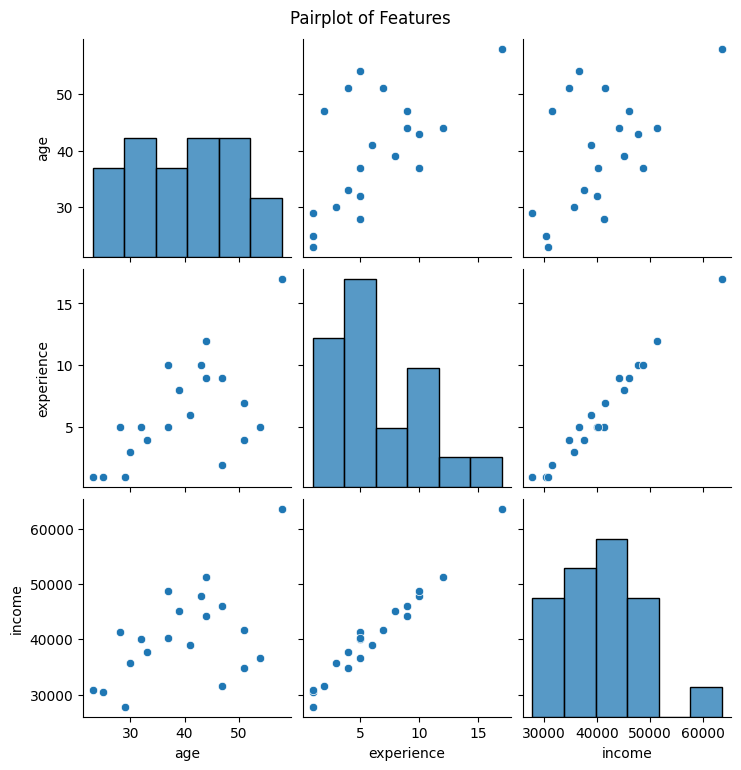

In [ ]:
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Modelling

In [ ]:
X = df[['age', 'experience']]
y = df['income']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

0.9387098237077887

Model kita mendapatkan accuracy score sebesar 93%

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

Mean Squared Error: 753796.77
R-squared Score: 0.9387

Model Coefficients:
Intercept: 31465.06
age: -101.06
experience: 2154.81


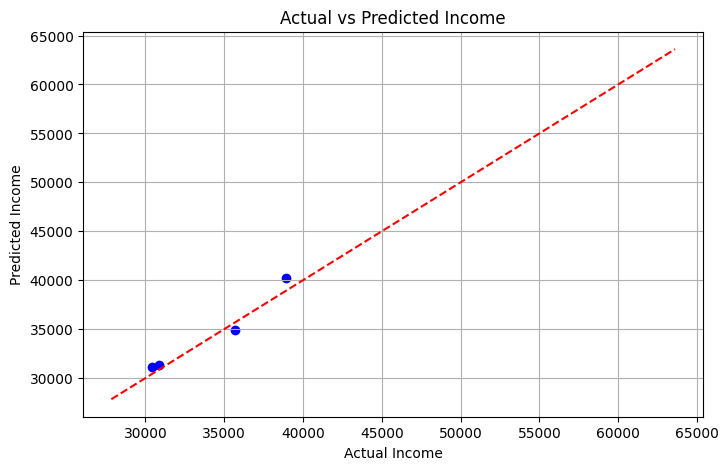

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Actual vs Predicted Income")
plt.grid(True)
plt.show()